In [1]:
import requests
import pandas as pd
from tqdm.notebook import trange, tqdm

In [2]:
#load title.basics.tsv from file. This is the table of movies.

titles = pd.read_csv('title.basics.tsv', sep='\t')
titles.set_index('tconst')

/var/folders/m4/8v9vfqhj2ndfyz6k8rmklb_40000gn/T/ipykernel_23430/1979675333.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles = pd.read_csv('title.basics.tsv', sep='\t')


,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...
tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"


In [3]:
#load title.ratings.tsv from file. This is the table of ratings and number of votes

ratings = pd.read_csv('title.ratings.tsv', sep='\t')
ratings.set_index('tconst')

,averageRating,numVotes
tconst,,
tt0000001,5.7,2041
tt0000002,5.7,272
tt0000003,6.5,1993
tt0000004,5.4,178
tt0000005,6.2,2751
...,...,...
tt9916730,7.0,12
tt9916766,7.1,23
tt9916778,7.2,36


In [133]:
#load name.basics.tsv from file. This is the table of people in the film industry

names = pd.read_csv('name.basics.tsv', sep='\t')

In [134]:
names

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
...,...,...,...,...,...,...
13384960,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
13384961,nm9993716,Essias Loberg,\N,\N,\N,\N
13384962,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13384963,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [5]:
#load title.principles.tsv from file. This is the table of cast and crew for each movie. (this files pretty big so will take some time)

principles = pd.read_csv('title.principals.tsv', sep='\t')

In [6]:
#only keep movies in titles

titles = titles.loc[titles['titleType'] == 'movie']

In [8]:
#join ratings table into titles table
df_titles = titles.merge(ratings, how='outer', on='tconst')

#drop null rows
df_titles = df_titles.dropna()

#drop tconst_y (redudant from joining rating table) and endYear (this is only relevant for shows that air across years)
df_titles = df_titles.drop(['endYear'], axis=1)
df_titles.set_index('tconst')

,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance,5.3,210.0
tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",5.2,509.0
tt0000502,movie,Bohemios,Bohemios,0,1905,100,\N,4.2,16.0
tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.0,881.0
tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama,5.4,24.0
...,...,...,...,...,...,...,...,...,...
tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History",6.4,5759.0
tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,"Adventure,History,War",3.4,18.0
tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama,8.6,7.0


In [9]:
#drop rows that have a null startYear, runtimeMinutes, and genres
df_titles = df_titles[df_titles.startYear != '\\N']
df_titles = df_titles[df_titles.runtimeMinutes != '\\N']
df_titles = df_titles[df_titles.genres != '\\N']

#only keep rows that have a startYear of >=1930 and numVotes >=500
df_titles = df_titles[pd.to_numeric(df_titles.startYear) >= 1930]
df_titles = df_titles[pd.to_numeric(df_titles.numVotes) >= 500]

In [10]:
df_titles.set_index('tconst')

,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,
tt0016029,movie,The Little Colonel,The Little Colonel,0,1935,81,"Comedy,Family,Musical",7.0,1876.0
tt0017961,movie,Happiness,Schaste,0,1935,95,"Comedy,Drama",7.3,1195.0
tt0019403,movie,Salt for Svanetia,Jim Shvante (marili svanets),0,1930,55,Documentary,7.6,891.0
tt0020163,movie,People on Sunday,Menschen am Sonntag,0,1930,73,"Comedy,Drama,Romance",7.3,3528.0
tt0020298,movie,Queen Kelly,Queen Kelly,0,1932,101,Drama,7.1,3357.0
...,...,...,...,...,...,...,...,...,...
tt9907782,movie,The Cursed,Eight for Silver,0,2021,111,"Fantasy,Horror,Mystery",6.2,15787.0
tt9908390,movie,Le lion,Le lion,0,2020,95,Comedy,5.5,1402.0
tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,"Comedy,Drama",7.4,3316.0


In [12]:
#dict for movie to genre edge table
genre_dict = {'tconst':[], 'genre':[]}

In [14]:
#we split the genres and append to new table
for index, row in tqdm(df_titles.iterrows(), total=df_titles.shape[0]):
    for genre in row.genres.split(','):
        genre_dict['tconst'].append(row.tconst)
        genre_dict['genre'].append(genre)

  0%|          | 0/60506 [00:00<?, ?it/s]

In [15]:
#construct new titles table with split genres
genre_edges = pd.DataFrame(data=genre_dict)
genre_edges.set_index('tconst')

df_titles = df_titles.drop('genres', axis=1)

In [16]:
#construct genres nodes
df_genres = pd.DataFrame(data={'genre':genre_edges['genre'].unique()})

In [17]:
#categories of people we want to keep for principles
principles_categories = ['actor', 'actress', 'director', 'composer', 'writer']

In [19]:
#keep only rows with the categories we want
principles_pre = principles[principles['category'].isin(principles_categories)]

#drop irrelevant columns. This table will the an edge table from person to movie, where person has a role in the movie
principles_pre = principles_pre.drop(['job', 'characters', 'ordering'], axis=1)

#only keep rows where the movie is in the titles table
principles_pre = principles_pre[principles_pre['tconst'].isin(df_titles['tconst'])]

In [20]:
principles_pre.set_index('tconst')

,nconst,category
tconst,,
tt0016029,nm0000073,actress
tt0016029,nm0000859,actor
tt0016029,nm0892867,actress
tt0016029,nm0517099,actor
tt0016029,nm0732408,actor
...,...,...
tt9916362,nm1893148,director
tt9916362,nm1893148,writer
tt9916362,nm3471432,writer


In [135]:
#keep only names where knownForTitles is not null and birthYear is not null
df_names = names[names.knownForTitles != '\\N']
df_names = df_names[df_names.birthYear != '\\N']

In [136]:
#only keep names that are in principles_pre table
df_names = df_names[df_names['nconst'].isin(principles_pre['nconst'])]

In [23]:
#we split the knownForTitles for each row into individual rows
u = []
v = []
for index, row in tqdm(df_names.iterrows(), total=df_names.shape[0]):
    for movie in row.knownForTitles.split(','):
        u.append(row.nconst)
        v.append(movie)

  0%|          | 0/124054 [00:01<?, ?it/s]

In [24]:
#create new table for edges from person to movie where person is known for being in that movie
knownfor_edges = pd.DataFrame(data={'u':u, 'v':v})

In [25]:
#drop knownForTitles from column
df_names = names.drop('knownForTitles', axis=1)
df_names.set_index('nconst')

,primaryName,birthYear,deathYear,primaryProfession
nconst,,,,
nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage"
nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer"
nm0000004,John Belushi,1949,1982,"actor,writer,music_department"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor"
...,...,...,...,...
nm9991365,Benjamin Dino,1996,\N,actor
nm9992452,Yuki Katayama,1996,\N,actress
nm9992659,Daniyar Alshinov,1987,\N,actor


In [26]:
#only keep rows where the person is in the names table
principles_pre = principles_pre[principles_pre['nconst'].isin(df_names['nconst'])]

In [27]:
df_titles.to_csv('titles.csv', index=False)
df_names.to_csv('names.csv', index=False)
principles_pre.to_csv('role_edges.csv', index=False)
knownfor_edges.to_csv('knownfor_edges.csv', index=False)
df_genres.to_csv('genres.csv', index=False)
genre_edges.to_csv('genre_edges.csv', index=False)

In [137]:
df_titles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes
9186,tt0016029,movie,The Little Colonel,The Little Colonel,0,1935,81,7.0,1876.0
10799,tt0017961,movie,Happiness,Schaste,0,1935,95,7.3,1195.0
12042,tt0019403,movie,Salt for Svanetia,Jim Shvante (marili svanets),0,1930,55,7.6,891.0
12669,tt0020163,movie,People on Sunday,Menschen am Sonntag,0,1930,73,7.3,3528.0
12785,tt0020298,movie,Queen Kelly,Queen Kelly,0,1932,101,7.1,3357.0
...,...,...,...,...,...,...,...,...,...
709285,tt9907782,movie,The Cursed,Eight for Silver,0,2021,111,6.2,15787.0
709288,tt9908390,movie,Le lion,Le lion,0,2020,95,5.5,1402.0
709370,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,7.4,3316.0
709444,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,5.8,1476.0


Cypher Queries for loading data into NEO4J:

match (n) detach delete n

match ()-[r]->() delete r


CREATE INDEX movie_index FOR (n:Movie) ON (n.index)

CREATE INDEX person_index FOR (n:Person) ON (n.index)

CREATE INDEX genre_index FOR (n:Genre) ON (n.name)

load csv with headers from
'file:///Users/Kewlwasabi/Documents/Northeastern/DS4300/HW6/titles.csv' as line
CREATE (:Movie {index: line.tconst, name: line.primaryTitle, isAdult: line.isAdult, year: line.startYear, runtime: line.runtimeMinutes, rating: line.averageRating, numVotes: line.numVotes})

load csv with headers from
'file:///Users/Kewlwasabi/Documents/Northeastern/DS4300/HW6/names.csv' as line
CREATE (:Person {index: line.nconst, name: line.primaryName, birth: line.birthYear, death: line.deathYear, professions: line.primaryProfession})

load csv with headers from
'file:///Users/Kewlwasabi/Documents/Northeastern/DS4300/HW6/genres.csv' as line
CREATE (:Genre {name: line.genre})

load csv with headers from
'file:///Users/Kewlwasabi/Documents/Northeastern/DS4300/HW6/knownfor_edges.csv' as line
match (x:Person {index: line.u})
match (y:Movie {index: line.v})
merge (x)-[e:KNOWN_FOR]->(y)

load csv with headers from
'file:///Users/Kewlwasabi/Documents/Northeastern/DS4300/HW6/role_edges.csv' as line
match (x:Person {index: line.nconst})
match (y:Movie {index: line.tconst})
merge (x)-[:ROLE_IN {role: line.category}]->(y)

load csv with headers from
'file:///Users/Kewlwasabi/Documents/Northeastern/DS4300/HW6/genre_edges.csv' as line
match (x:Movie {index: line.tconst})
match (y:Genre {name: line.genre})
merge (x)-[e:IS_A]->(y)


Cypher Queries for data visualization:

Actors that worked with Alfred Hitchcock:

MATCH movies_by=(n:Person {name: 'Alfred Hitchcock'})-[]->(m:Movie) WHERE toInteger(m.year) > 1949 AND toInteger(m.year) < 1970
MATCH movie_actors=(p:Person)-[e:ROLE_IN]->(m) WHERE e.role = "actor" OR e.role = "actress"
RETURN movie_actors

Actors that worked with Martin Scorsese:

MATCH movies_by=(n:Person {name: 'Martin Scorsese'})-[]->(m:Movie) WHERE toInteger(m.rating) > 7
MATCH movie_actors=(p:Person)-[e:ROLE_IN]->(m) WHERE e.role = "actor" OR e.role = "actress"
RETURN movie_actors


Actors that worked with Quentin Tarantino:

MATCH movies_by=(n:Person {name: 'Quentin Tarantino'})-[]->(m:Movie) WHERE toInteger(m.rating) > 7
MATCH movie_actors=(p:Person)-[e:ROLE_IN]->(m) WHERE e.role = "actor" OR e.role = "actress"
RETURN movie_actors


Actors that worked with Christopher Nolan:

MATCH movies_by=(n:Person {name: 'Christopher Nolan'})-[]->(m:Movie) WHERE toInteger(m.rating) > 7
MATCH movie_actors=(p:Person)-[e:ROLE_IN]->(m) WHERE e.role = "actor" OR e.role = "actress"
RETURN movie_actors


Percentage of cast reused and average rating for each director where movies have >10000 votes:

MATCH movies_by=(n:Person)-[:ROLE_IN {role: 'director'}]->(m:Movie)
MATCH movie_actors=(p:Person)-[e:ROLE_IN]->(m) WHERE e.role = "actor" OR e.role = "actress"
WITH n.name as director, count(p) as movie_roles, count(distinct p) as casted, avg(toFloat(m.rating)) as avg_rating, avg(toInteger(m.numVotes)) as numVotes
WHERE numVotes > 10000
RETURN director, (1-(toFloat(casted)/toFloat(movie_roles))) as reused_percentage, avg_rating
ORDER BY numVotes DESC

For a specific time frame:

MATCH movies_by=(n:Person)-[:ROLE_IN {role: 'director'}]->(m:Movie)
MATCH movie_actors=(p:Person)-[e:ROLE_IN]->(m) WHERE (e.role = "actor" OR e.role = "actress") AND toInteger(m.year) > 1990 AND toInteger(m.year) < 2009
WITH n.name as director, count(p) as movie_roles, count(distinct p) as casted, avg(toFloat(m.rating)) as avg_rating, avg(toInteger(m.numVotes)) as numVotes
WHERE numVotes > 10000
RETURN director, (1-(toFloat(casted)/toFloat(movie_roles))) as reused_percentage, avg_rating
ORDER BY numVotes DESC

Kevin bacon number:

MATCH p=shortestPath((:Person {name:"Kevin Bacon"})-[:ROLE_IN*..8]-(m:Person))
WHERE m.name <> 'Kevin Bacon'
RETURN m.name, length(p)
ORDER BY length(p) DESC LIMIT 20

In [64]:
unique_cast = pd.read_csv('unique_cast.csv')

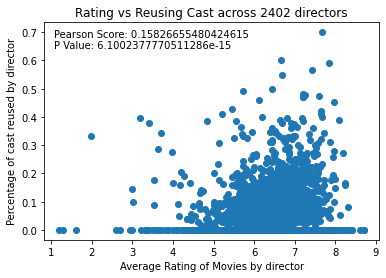

Pearson Score 0.15826655480424615
P Value 6.1002377770511286e-15


<Figure size 432x288 with 0 Axes>

In [172]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

pearson_score = pearsonr(unique_cast['reused_percentage'], unique_cast['avg_rating'])

f, ax = plt.subplots()
plt.plot(unique_cast['avg_rating'], unique_cast['reused_percentage'], 'o')
plt.ylabel('Percentage of cast reused by director')
plt.xlabel('Average Rating of Movies by director')
plt.title('Rating vs Reusing Cast across 2402 directors')
plt.text(.03, .97, f'Pearson Score: {pearson_score.statistic}\nP Value: {pearson_score.pvalue}', ha='left', va='top', transform=ax.transAxes)
plt.show()
plt.savefig('reuse.png')

print(f'Pearson Score {pearson_score.statistic}')
print(f'P Value {pearson_score.pvalue}')

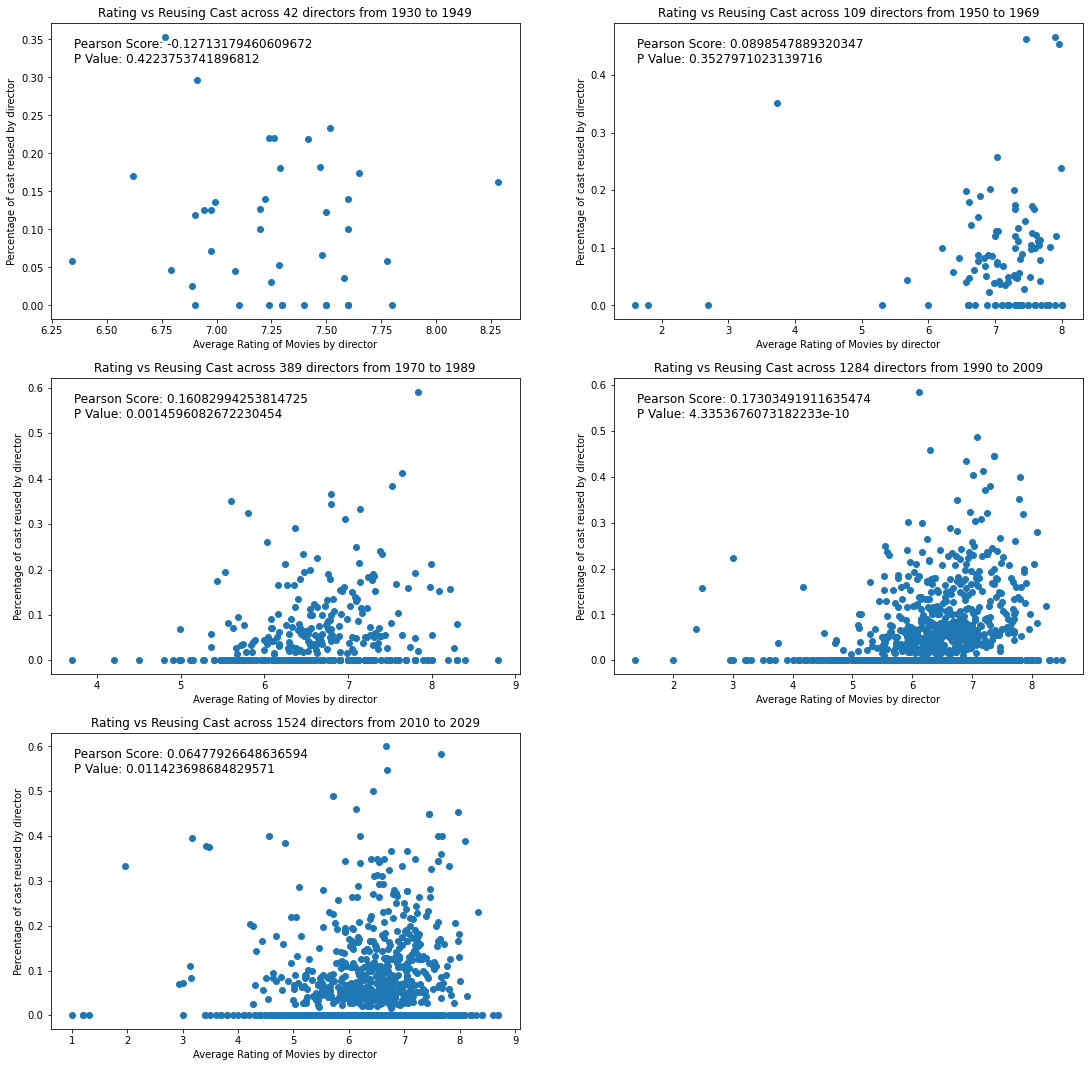

In [174]:
buckets = [1930, 1950, 1970, 1990, 2010]

fig, ax = plt.subplots(nrows=3, ncols=2)

fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)

idx = 0
for row in ax:
    for col in row:
        if idx < 5:
            bucket = buckets[idx]
        idx += 1
        df = pd.read_csv(f'other/unique_cast_{bucket}.csv')

        pearson_score = pearsonr(df['reused_percentage'], df['avg_rating'])

        col.plot(df['avg_rating'], df['reused_percentage'], 'o')
        col.set_ylabel('Percentage of cast reused by director')
        col.set_xlabel('Average Rating of Movies by director')
        col.set_title(f'Rating vs Reusing Cast across {len(df)} directors from {bucket} to {bucket+19}')   
        col.text(0.05, 0.95, f'Pearson Score: {pearson_score.statistic}\nP Value: {pearson_score.pvalue}', transform=col.transAxes, fontsize=12, va='top', ha='left')
        if idx > 5:
            col.set_visible(False)
plt.savefig('all_plots.png')